In [7]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import prince

In [8]:
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

In [9]:
X = StandardScaler().fit_transform(X)

In [10]:
X.shape

(1000, 12)

In [11]:
X = pd.DataFrame(X)

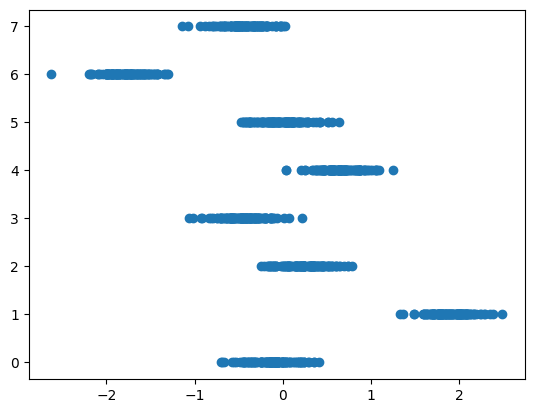

In [22]:
plt.scatter(X.loc[:,0], y)
plt.show()

In [13]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

In [14]:
db = DBSCAN(eps=0.8).fit(X)
labels = db.labels_

In [15]:
labels

array([ 0,  1,  2,  1,  3,  4,  5,  6,  3,  3,  3,  4,  0,  1,  5,  5,  7,
        7,  5,  5,  1,  3,  0,  5,  2,  3,  4,  3,  6,  4,  7,  6,  2,  4,
        2,  6,  3,  7,  1,  1,  1,  4,  3,  5,  5,  1,  4,  4,  6,  4,  4,
        7,  5,  1,  1,  0,  0,  3,  7,  2,  4,  7,  0,  2,  1,  4,  6,  2,
        3,  0,  7,  5,  4,  4,  3,  6,  6,  7,  2,  0,  3,  7,  3,  2,  4,
        2,  6,  1,  7,  2,  1,  6,  5,  4,  7,  0,  2,  4,  0,  7,  0,  0,
        0,  6,  2,  5,  2,  2,  2,  0,  2,  2,  2,  5,  1,  4,  2,  7,  5,
        3,  3,  1,  1,  1,  7,  4,  5,  1,  0,  4,  4,  1,  7,  7,  4,  1,
        7,  6,  5,  7,  6,  4,  2,  3,  2,  4,  7,  7,  4,  1,  5,  7,  2,
        3,  6,  5,  4,  4,  7,  2,  7,  5,  2,  5,  6,  2,  2,  1,  1,  0,
        5,  0,  4,  5,  6,  6,  7,  5,  6,  1,  7,  0,  5,  5,  7,  1,  4,
        4,  5,  1,  2,  3,  7,  3,  0,  7,  0,  6,  4,  3,  6,  4,  0,  5,
        3,  5,  5,  2,  6,  5,  5,  7,  1,  0,  2,  6,  0,  3,  0,  6,  1,
        0,  0,  1,  7,  7

In [16]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 8
Estimated number of noise points: 2


In [17]:
def get_pca_2d(df, predict):
  pca_2d_object = prince.PCA(
  n_components=2,
  n_iter=3,
  rescale_with_mean=True,
  rescale_with_std=True,
  copy=True,
  check_input=True,
  engine='sklearn',
  random_state=42
  )

  pca_2d_object.fit(df)

  df_pca_2d = pca_2d_object.transform(df)
  df_pca_2d.columns = ["comp1", "comp2"]
  df_pca_2d["cluster"] = predict

  return pca_2d_object, df_pca_2d



def get_pca_3d(df, predict):
  pca_3d_object = prince.PCA(
  n_components=3,
  n_iter=3,
  rescale_with_mean=True,
  rescale_with_std=True,
  copy=True,
  check_input=True,
  engine='sklearn',
  random_state=42
  )

  pca_3d_object.fit(df)

  df_pca_3d = pca_3d_object.transform(df)
  df_pca_3d.columns = ["comp1", "comp2", "comp3"]
  df_pca_3d["cluster"] = predict

  return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):
  df = df.astype({"cluster": "object"})
  df = df.sort_values("cluster")

  fig = px.scatter_3d(df, 
                      x='comp1', 
                      y='comp2', 
                      z='comp3',
                      color='cluster',
                      template="plotly",
                      
                      # symbol = "cluster",
                      
                      color_discrete_sequence=px.colors.qualitative.Vivid,
                      title=title).update_traces(
                        # mode = 'markers',
                        marker={
                          "size": 4,
                          "opacity": opacity,
                          # "symbol" : "diamond",
                          "line": {
                              "width": width_line,
                              "color": "black",
                          }
                        }
                      ).update_layout(
                            width = 1000, 
                            height = 800, 
                            autosize = False, 
                            showlegend = True,
                            legend=dict(title_font_family="Times New Roman",
                                        font=dict(size= 20)),
                            scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                        yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                        zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                            font = dict(family = "Gilroy", color  = 'black', size = 15))
                    
  
  fig.show()


def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):
  df = df.astype({"cluster": "object"})
  df = df.sort_values("cluster")

  fig = px.scatter(df, 
                    x='comp1', 
                    y='comp2', 
                    color='cluster',
                    template="plotly",
                    # symbol = "cluster",
                    
                    color_discrete_sequence=px.colors.qualitative.Vivid,
                    title=title).update_traces(
                      # mode = 'markers',
                      marker={
                          "size": 8,
                          "opacity": opacity,
                          # "symbol" : "diamond",
                          "line": {
                              "width": width_line,
                              "color": "black",
                          }
                      }
                    ).update_layout(
                          width = 800, 
                          height = 700, 
                          autosize = False, 
                          showlegend = True,
                          legend=dict(title_font_family="Times New Roman",
                                      font=dict(size= 20)),
                          scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                      yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                      ),
                          font = dict(family = "Gilroy", color  = 'black', size = 15))
                      
      
  fig.show()

In [18]:
pca_3d_object, df_pca_3d = get_pca_3d(X, labels)
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=1, width_line = 0.1)

In [19]:
pca_2d_object, df_pca_2d = get_pca_2d(X, labels)
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=1, width_line = 0.5)

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [24]:
print(f"Davies bouldin score: {davies_bouldin_score(X, labels)}")
print(f"Calinski Score: {calinski_harabasz_score(X, labels)}")
print(f"Silhouette Score: {silhouette_score(X, labels)}")

Davies bouldin score: 1.0232467033142743
Calinski Score: 3322.671508646853
Silhouette Score: 0.7514332790166374
